# Exportación y Limpieza

In [ ]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import fs
try:
    from geopy.geocoders import Nominatim
except:
    !pip install -U geopy
    from geopy.geocoders import Nominatim

In [ ]:
url = 'https://gbfs.mex.lyftbikes.com/gbfs/es/station_information.json'

response = requests.get(url)
data = response.json()

df = pd.json_normalize(data['data']['stations'])

df

,station_id,external_id,name,short_name,lat,lon,rental_methods,capacity,electric_bike_surcharge_waiver,is_charging,eightd_has_key_dispenser,has_kiosk
0,5,3ea89109-d2f3-46eb-9c41-c43742050340,CE-407 Prolongación Xochicalco-General Emilia...,407,19.367266,-99.158656,"[KEY, CREDITCARD]",19,False,False,False,True
1,6,ba78b703-4e5a-44bd-ab2c-1eedc71e11c3,CE-428 Prolongación Uxmal-Av. Popocatépetl (E...,428,19.363404,-99.160395,"[KEY, CREDITCARD]",27,False,False,False,True
2,7,6563d263-2342-46e3-8983-461e68d2d615,CE-427 Avenida México-Coyoacán-Av. Popocatépet...,427,19.364906,-99.162987,"[KEY, CREDITCARD]",19,False,False,False,True
3,8,ec55e597-c8fc-4e86-bcfe-b0e81a494790,CE-443 Bruno Traven-Golondrinas,443,19.359583,-99.162085,"[KEY, CREDITCARD]",31,False,False,False,True
4,9,a98c7fac-12ce-4895-923b-6b39f04721ca,CE-423 Moras-José María Rico (Eje 8),423,19.367816,-99.175269,"[KEY, CREDITCARD]",23,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
662,681,d7e7ebcf-c8e1-4706-8ade-a39a02746745,CE-509 Juárez - Venecia,509,19.459686,-99.181778,"[KEY, CREDITCARD]",19,False,False,False,True
663,682,00e1da38-bffd-41e3-96b5-c340e7ff2b2a,CE-533 Av Plan de San Luis - Eulalia Gúzman,533,19.460494,-99.167270,"[KEY, CREDITCARD]",23,False,False,False,True
664,683,c2821ebe-6933-4b30-98cb-1ca3b3f35ec5,CE-440 Martin Mendalde - M. López Cotilla,440,19.361792,-99.171471,"[KEY, CREDITCARD]",27,False,False,False,True
665,688,886c46bc-d6cc-477e-ad1e-2b980446fba7,Sup002,Sup002,0.000000,0.000000,"[KEY, CREDITCARD]",0,False,False,False,False


In [ ]:
df.lon.describe()

count    667.000000
mean     -98.869929
std        5.426205
min      -99.212845
25%      -99.178004
50%      -99.167040
75%      -99.155902
max        0.000000
Name: lon, dtype: float64

In [ ]:
df[df['lon'] == 0]

,station_id,external_id,name,short_name,lat,lon,rental_methods,capacity,electric_bike_surcharge_waiver,is_charging,eightd_has_key_dispenser,has_kiosk
665,688,886c46bc-d6cc-477e-ad1e-2b980446fba7,Sup002,Sup002,0.0,0.0,"[KEY, CREDITCARD]",0,False,False,False,False
666,689,4f90cbe8-e841-4614-9274-93b86def30df,1123,1123,0.0,0.0,"[KEY, CREDITCARD]",0,False,False,False,False


In [ ]:
df = df.drop(df[df['lon'] == 0].index)

In [ ]:
df.lon.describe()

count    665.000000
mean     -99.167282
std        0.016471
min      -99.212845
25%      -99.178011
50%      -99.167066
75%      -99.156102
max      -99.130918
Name: lon, dtype: float64

In [ ]:
MAIN_DIR = fs.open_fs("../../data/raw/Estaciones")
CSV_DIR = MAIN_DIR.getsyspath("estaciones_ecobici_sist_anterior.csv")

In [ ]:
sist_ant_df = pd.read_csv(CSV_DIR)
sist_ant_df

,sistema,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud,tipo_ce,candados
0,ECOBICI,1,Río Sena - Río Balsas,Río Sena,Río Balsas,Cuauhtémoc,CUAUHTEMOC,19.433590,-99.167819,4G,27
1,ECOBICI,2,Río Guadalquivir - Río Nazas,Río Guadalquivir,Río Nazas,Cuauhtémoc,CUAUHTEMOC,19.430510,-99.171201,3G,21
2,ECOBICI,3,Reforma - Insurgentes,Reforma,Insurgentes,Tabacalera,CUAUHTEMOC,19.431630,-99.158547,4G,36
3,ECOBICI,4,Río Nilo - Río Pánuco,Río Nilo,Río Pánuco,Cuauhtémoc,CUAUHTEMOC,19.428491,-99.171693,3G,15
4,ECOBICI,5,Río Pánuco - Río Tíber,Río Pánuco,Río Tíber,Cuauhtémoc,CUAUHTEMOC,19.429804,-99.169451,3G,12
...,...,...,...,...,...,...,...,...,...,...,...
475,ECOBICI,476,Lago Como - Laguna de Mayrán,Lago Como,Laguna de Mayrán,Granada,MIGUEL HIDALGO,19.442127,-99.184433,4G,36
476,ECOBICI,477,Lago Iseo - Laguna de Mayrán,Lago Iseo,Laguna de Mayrán,Anáhuac I Sección,MIGUEL HIDALGO,19.440905,-99.181743,3G,24
477,ECOBICI,478,Laguna de Mayrán - Lago Chalco,Laguna de Mayrán,Lago Chalco,Anáhuac I Sección,MIGUEL HIDALGO,19.440818,-99.176961,3G,27
478,ECOBICI,479,Lago Muritz - Av. Marina Nacional,Lago Muritz,Av. Marina Nacional,Mariano Escobedo,MIGUEL HIDALGO,19.444433,-99.179664,Multimedial,24


# Cluster de Estaciones

## Sistema Viejo

In [ ]:
# Función para calcular la distancia entre dos coordenadas

import numpy as np

def distance_calculator_viejo(row):
    R_earth = 6370

    lat_x = row['latitud_x'] * (np.pi / 180)
    lon_x = row['longitud_x'] * (np.pi / 180)
    lat_y = row['latitud_y'] * (np.pi / 180)
    lon_y = row['longitud_y'] * (np.pi / 180)

    a = np.cos(lat_x) * np.cos(lat_y) * np.cos(lon_x) * np.cos(lon_y)
    b = np.cos(lat_x) * np.sin(lon_x) * np.cos(lat_y) * np.sin(lon_y)
    c = np.sin(lat_x) * np.sin(lat_y)

    distance = np.arccos(a + b + c) * R_earth

    return round(distance, 2)

In [ ]:
old_stations_df = sist_ant_df[['latitud','longitud']]
old_stations_df.head()

,latitud,longitud
0,19.433590,-99.167819
1,19.430510,-99.171201
2,19.431630,-99.158547
3,19.428491,-99.171693
4,19.429804,-99.169451


In [ ]:
# Cluster de estaciones cercanas utilizando K Means

old_stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   latitud   480 non-null    float64
 1   longitud  480 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB


### KMeans

Se utiliza la heurística de Pareto para el número de clusters. El 20% de 665 estaciones totales es 133.

In [ ]:
from sklearn.cluster import KMeans

model_1 = KMeans(n_clusters=96, random_state=42) # 20% de 480 - 96
y_kmeans_1 = model_1.fit_predict(old_stations_df)

In [ ]:
old_stations_df['cluster'] = y_kmeans_1
#sist_ant_df['cluster'] = y_kmeans

/tmp/ipykernel_185/3127794054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_stations_df['cluster'] = y_kmeans_1


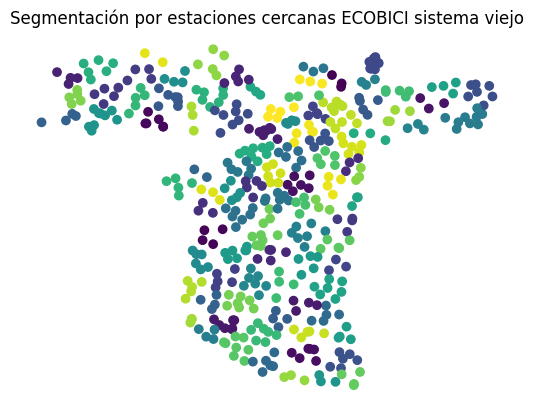

In [ ]:
plt.scatter(old_stations_df['longitud'], old_stations_df['latitud'], c=old_stations_df['cluster'])

plt.title('Segmentación por estaciones cercanas ECOBICI sistema viejo')

plt.axis('off')

plt.show()

### Asignación de colores por cluster

In [ ]:
# Colores para clusters

import random

colors = ['darkgreen', 'darkblue', 'orange', 'purple', 'cadetblue', \
        'lightred', 'beige', 'gray', 'pink', 'darkred', \
        'lightblue', 'red', 'green', 'lightgray',\
         'blue']


old_cluster_colors = [colors[random.randint(0,14)] for i in range(old_stations_df.cluster.nunique())]

old_cluster_color_dict = {
    'cluster' : old_stations_df.cluster.unique().tolist(),
    'color' : old_cluster_colors
}

old_cluster_color_df = pd.DataFrame(old_cluster_color_dict)

In [ ]:
old_stations_df = pd.merge(old_stations_df, old_cluster_color_df,
                                left_on='cluster',
                                right_on='cluster',
                                how='inner'
)

old_stations_df

,latitud,longitud,cluster,color
0,19.433590,-99.167819,68,orange
1,19.434081,-99.162434,68,orange
2,19.433803,-99.166223,68,orange
3,19.430510,-99.171201,95,pink
4,19.428491,-99.171693,95,pink
...,...,...,...,...
475,19.439249,-99.181065,79,darkblue
476,19.442127,-99.184433,79,darkblue
477,19.440905,-99.181743,79,darkblue
478,19.444433,-99.179664,79,darkblue


### Cálculo de distancias Centroide - Estación

In [ ]:
old_centroids = pd.DataFrame(model_1.cluster_centers_, columns=['latitud','longitud'])
old_centroids.head()

,latitud,longitud
0,19.437596,-99.158937
1,19.397457,-99.182111
2,19.427155,-99.192380
3,19.366940,-99.164676
4,19.411123,-99.166064


In [ ]:
old_inter_station_distance = pd.merge(old_stations_df, old_centroids, how='inner', left_on='cluster', right_index=True)
old_inter_station_distance.head()

,latitud_x,longitud_x,cluster,color,latitud_y,longitud_y
0,19.433590,-99.167819,68,orange,19.433825,-99.165492
1,19.434081,-99.162434,68,orange,19.433825,-99.165492
2,19.433803,-99.166223,68,orange,19.433825,-99.165492
3,19.430510,-99.171201,95,pink,19.429590,-99.169869
4,19.428491,-99.171693,95,pink,19.429590,-99.169869


In [ ]:
old_inter_station_distance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 479
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitud_x   480 non-null    float64
 1   longitud_x  480 non-null    float64
 2   cluster     480 non-null    int32  
 3   color       480 non-null    object 
 4   latitud_y   480 non-null    float64
 5   longitud_y  480 non-null    float64
dtypes: float64(4), int32(1), object(1)
memory usage: 24.4+ KB


In [ ]:
old_inter_station_distance = old_inter_station_distance.assign(centroid_distance = lambda row: distance_calculator_viejo(row))

old_inter_station_distance

,latitud_x,longitud_x,cluster,color,latitud_y,longitud_y,centroid_distance
0,19.433590,-99.167819,68,orange,19.433825,-99.165492,0.25
1,19.434081,-99.162434,68,orange,19.433825,-99.165492,0.32
2,19.433803,-99.166223,68,orange,19.433825,-99.165492,0.08
3,19.430510,-99.171201,95,pink,19.429590,-99.169869,0.17
4,19.428491,-99.171693,95,pink,19.429590,-99.169869,0.23
...,...,...,...,...,...,...,...
475,19.439249,-99.181065,79,darkblue,19.442557,-99.181712,0.37
476,19.442127,-99.184433,79,darkblue,19.442557,-99.181712,0.29
477,19.440905,-99.181743,79,darkblue,19.442557,-99.181712,0.18
478,19.444433,-99.179664,79,darkblue,19.442557,-99.181712,0.30


In [ ]:
old_inter_station_distance.centroid_distance.describe()

count    480.000000
mean       0.202458
std        0.091141
min        0.010000
25%        0.140000
50%        0.200000
75%        0.260000
max        0.520000
Name: centroid_distance, dtype: float64

### Gráfica

In [ ]:
import folium
import random

lat = old_stations_df.iloc[0]['latitud']
lng = old_stations_df.iloc[0]['longitud']
m = folium.Map(location=[lat, lng], zoom_start=12)

for _, row in old_stations_df.iterrows():
    color = old_cluster_color_df[old_cluster_color_df['cluster'] == row['cluster']].color.values[0]
    folium.Marker(
        [row["latitud"], row["longitud"]],
        icon=folium.Icon(color=color, prefix='fa')
    ).add_to(m)

for _, row in old_centroids.iterrows():
    folium.Marker(
        [row["latitud"], row["longitud"]],
        icon=folium.Icon(color='black', prefix='fa')
    ).add_to(m)

m

## Sistema Nuevo

In [ ]:
# Función para calcular la distancia entre dos coordenadas

import numpy as np

def distance_calculator_nuevo(row):
    R_earth = 6370

    lat_x = row['lat_x'] * (np.pi / 180)
    lon_x = row['lon_x'] * (np.pi / 180)
    lat_y = row['lat_y'] * (np.pi / 180)
    lon_y = row['lon_y'] * (np.pi / 180)

    a = np.cos(lat_x) * np.cos(lat_y) * np.cos(lon_x) * np.cos(lon_y)
    b = np.cos(lat_x) * np.sin(lon_x) * np.cos(lat_y) * np.sin(lon_y)
    c = np.sin(lat_x) * np.sin(lat_y)

    distance = np.arccos(a + b + c) * R_earth

    return round(distance, 2)

In [ ]:
stations_df = df[['lat','lon']]
stations_df.head()

,lat,lon
0,19.367266,-99.158656
1,19.363404,-99.160395
2,19.364906,-99.162987
3,19.359583,-99.162085
4,19.367816,-99.175269


In [ ]:
# Cluster de estaciones cercanas utilizando K Means

stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     665 non-null    float64
 1   lon     665 non-null    float64
dtypes: float64(2)
memory usage: 10.5 KB


In [ ]:
stations_df.index.nunique()

665

### KMeans

Se utiliza la heurística de Pareto para el número de clusters. El 20% de 665 estaciones totales es 133.

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=133, random_state=42)
y_kmeans = model.fit_predict(stations_df)

In [ ]:
stations_df['cluster'] = y_kmeans
df['cluster'] = y_kmeans

/tmp/ipykernel_185/3589935352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_df['cluster'] = y_kmeans


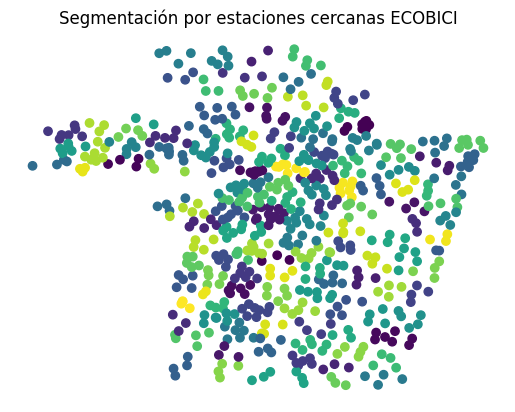

In [ ]:
plt.scatter(stations_df['lon'], stations_df['lat'], c=stations_df['cluster'])

plt.title('Segmentación por estaciones cercanas ECOBICI')

plt.axis('off')

plt.show()

### Asignación de colores por cluster

In [ ]:
# Colores para clusters

import random

colors = ['darkgreen', 'darkblue', 'orange', 'purple', 'cadetblue', \
        'lightred', 'beige', 'gray', 'pink', 'darkred', \
        'lightblue', 'red', 'green', 'lightgray',\
         'blue']


cluster_colors = [colors[random.randint(0,14)] for i in range(stations_df.cluster.nunique())]

cluster_color_dict = {
    'cluster' : stations_df.cluster.unique().tolist(),
    'color' : cluster_colors
}

cluster_color_df = pd.DataFrame(cluster_color_dict)

In [ ]:
stations_df = pd.merge(stations_df, cluster_color_df,
                                left_on='cluster',
                                right_on='cluster',
                                how='inner'
)

stations_df

,lat,lon,cluster,color
0,19.367266,-99.158656,24,purple
1,19.363404,-99.160395,24,purple
2,19.364906,-99.162987,24,purple
3,19.368107,-99.164376,24,purple
4,19.359583,-99.162085,86,blue
...,...,...,...,...
660,19.394974,-99.138949,37,lightblue
661,19.408087,-99.137763,60,blue
662,19.404668,-99.136946,60,blue
663,19.406326,-99.138779,60,blue


### Cálculo de distancias Centroide - Estación

In [ ]:
centroids = pd.DataFrame(model.cluster_centers_, columns=['lat','lon'])
centroids.head()

,lat,lon
0,19.442155,-99.153171
1,19.391914,-99.168584
2,19.428369,-99.195913
3,19.361967,-99.147519
4,19.424876,-99.172460


In [ ]:
inter_station_distance = pd.merge(stations_df, centroids, how='inner', left_on='cluster', right_index=True)
inter_station_distance.head()

,lat_x,lon_x,cluster,color,lat_y,lon_y
0,19.367266,-99.158656,24,purple,19.365921,-99.161603
1,19.363404,-99.160395,24,purple,19.365921,-99.161603
2,19.364906,-99.162987,24,purple,19.365921,-99.161603
3,19.368107,-99.164376,24,purple,19.365921,-99.161603
4,19.359583,-99.162085,86,blue,19.359115,-99.162161


In [ ]:
inter_station_distance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 665 entries, 0 to 664
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lat_x    665 non-null    float64
 1   lon_x    665 non-null    float64
 2   cluster  665 non-null    int32  
 3   color    665 non-null    object 
 4   lat_y    665 non-null    float64
 5   lon_y    665 non-null    float64
dtypes: float64(4), int32(1), object(1)
memory usage: 33.8+ KB


In [ ]:
inter_station_distance = inter_station_distance.assign(centroid_distance = lambda row: distance_calculator_nuevo(row))

inter_station_distance

,lat_x,lon_x,cluster,color,lat_y,lon_y,centroid_distance
0,19.367266,-99.158656,24,purple,19.365921,-99.161603,0.34
1,19.363404,-99.160395,24,purple,19.365921,-99.161603,0.31
2,19.364906,-99.162987,24,purple,19.365921,-99.161603,0.18
3,19.368107,-99.164376,24,purple,19.365921,-99.161603,0.38
4,19.359583,-99.162085,86,blue,19.359115,-99.162161,0.05
...,...,...,...,...,...,...,...
660,19.394974,-99.138949,37,lightblue,19.395029,-99.139234,0.03
661,19.408087,-99.137763,60,blue,19.407140,-99.137345,0.11
662,19.404668,-99.136946,60,blue,19.407140,-99.137345,0.28
663,19.406326,-99.138779,60,blue,19.407140,-99.137345,0.18


In [ ]:
inter_station_distance.centroid_distance.describe()

count    665.000000
mean       0.239850
std        0.105432
min        0.000000
25%        0.170000
50%        0.250000
75%        0.310000
max        0.550000
Name: centroid_distance, dtype: float64

### Gráfica

In [ ]:
import folium
import random

lat = stations_df.iloc[0]['lat']
lng = stations_df.iloc[0]['lon']
m = folium.Map(location=[lat, lng], zoom_start=12)

for _, row in stations_df.iterrows():
    color = cluster_color_df[cluster_color_df['cluster'] == row['cluster']].color.values[0]
    folium.Marker(
        [row["lat"], row["lon"]],
        icon=folium.Icon(color=color, prefix='fa')
    ).add_to(m)

for _, row in centroids.iterrows():
    folium.Marker(
        [row["lat"], row["lon"]],
        icon=folium.Icon(color='black', prefix='fa')
    ).add_to(m)

m

# ANOVA - Distancias entre centroide y estaciones

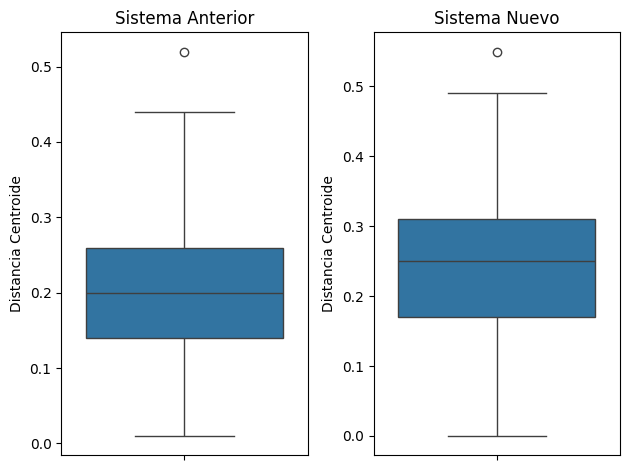

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1,2)

ax1 = axs[0]
ax2 = axs[1]

sns.boxplot(old_inter_station_distance['centroid_distance'], ax=ax1)
ax1.title.set_text("Sistema Anterior")
ax1.set_ylabel("Distancia Centroide")

sns.boxplot(inter_station_distance['centroid_distance'], ax=ax2)
ax2.title.set_text("Sistema Nuevo")
ax2.set_ylabel("Distancia Centroide")

fig.tight_layout()

plt.show()


In [ ]:
import scipy.stats as stats

f_value, p_value = stats.f_oneway(
    old_inter_station_distance['centroid_distance'].dropna(),
    inter_station_distance['centroid_distance'].dropna())

print(f_value, p_value)

39.21666324032186 5.358571030236762e-10


Como f_value > p_value, hay evidencia estadísticamente significativa para rechazar Ho. Es decir, las medias son distintas.

# Afluencia vs Estaciones

## Sistema Viejo

In [ ]:
# 2018

ECO_DIR = fs.open_fs("../../data/raw/Ecobici viajes")
ECO_CSV_DIR = ECO_DIR.getsyspath("Global_events_extended.csv")

global_events_df = pd.read_csv(ECO_CSV_DIR)
global_events_df.short_name.nunique()

346

In [ ]:
estaciones_sist_ant_df = sist_ant_df[['latitud','longitud']]
estaciones_sist_ant_df.head()

,latitud,longitud
0,19.433590,-99.167819
1,19.430510,-99.171201
2,19.431630,-99.158547
3,19.428491,-99.171693
4,19.429804,-99.169451


In [ ]:
import folium
from folium.plugins import FastMarkerCluster, HeatMap
import numpy as np

m = folium.Map(
    location=[np.mean(estaciones_sist_ant_df['latitud']), np.mean(estaciones_sist_ant_df['longitud'])],
    tiles='Cartodb Positron',
    zoom_start=12
)

HeatMap(global_events_df[['lat','lon','global_events']].values.tolist()).add_to(m)

FastMarkerCluster(data=list(zip(estaciones_sist_ant_df['latitud'], estaciones_sist_ant_df['longitud']))).add_to(m)

folium.LayerControl().add_to(m)

m

## Sistema Nuevo

In [ ]:
ECO_GLOB_CSV_DIR = ECO_DIR.getsyspath("Global_events_extended_2023.csv")

In [ ]:
global_events_new_df = pd.read_csv(ECO_GLOB_CSV_DIR)
global_events_new_df.head()

,short_name,origin,destination,global_events,lat,lon,capacity
0,64,98876.0,95614,194490.0,19.412967,-99.166925,27
1,27,95009.0,92842,187851.0,19.429160,-99.162703,43
2,43,77470.0,68351,145821.0,19.435136,-99.146076,31
3,1,73654.0,71336,144990.0,19.433478,-99.167790,35
4,14,75320.0,65357,140677.0,19.424540,-99.173247,39


In [ ]:
from folium.plugins import FastMarkerCluster, HeatMap
import numpy as np

m = folium.Map(
    location=[np.mean(stations_df['lat']), np.mean(stations_df['lon'])],
    tiles='Cartodb Positron',
    zoom_start=12
)

HeatMap(global_events_new_df[['lat','lon','global_events']].values.tolist()).add_to(m)

FastMarkerCluster(data=list(zip(stations_df['lat'], stations_df['lon'], stations_df['color']))).add_to(m)

folium.LayerControl().add_to(m)


m

# Cercanía de Estaciones

## Por cluster

In [ ]:
near_stations = df[['cluster', 'short_name']].groupby(['cluster', 'short_name']).size().reset_index(name='Count')

near_stations = near_stations.drop(columns='Count')

near_stations.head()

,cluster,short_name
0,0,176
1,0,264-275
2,0,265
3,0,266-267
4,0,268-269


In [ ]:
near_stations_list = []

for i in range(near_stations.cluster.nunique()):
    stations = near_stations[near_stations['cluster'] == i]['short_name'].tolist()
    near_stations_list.append(stations)

In [ ]:
def find_element_index(list_of_lists, element):
    for i, sublist in enumerate(list_of_lists):
        if element in sublist:
            return (i, sublist.index(element))
    return None

In [ ]:
number_near_stations_dict = {}

for i in near_stations_list:
    for j in i:
        index = find_element_index(near_stations_list, j)
        number_near_stations = len(near_stations_list[index[0]]) - 1
        number_near_stations_dict[j] = number_near_stations

In [ ]:
near_stations_dict = {
    'station_id' : [key for key in number_near_stations_dict.keys()],
    'near_station_count' : [key for key in number_near_stations_dict.values()]
    }


In [ ]:
near_stations_df = pd.DataFrame(near_stations_dict)
near_stations_df.head()

,station_id,near_station_count
0,176,8
1,264-275,8
2,265,8
3,266-267,8
4,268-269,8


In [ ]:
near_stations_df.near_station_count.describe()

count    665.000000
mean       4.613534
std        1.906583
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       11.000000
Name: near_station_count, dtype: float64

## Por Estación

In [ ]:
df.head()

,station_id,external_id,name,short_name,lat,lon,rental_methods,capacity,electric_bike_surcharge_waiver,is_charging,eightd_has_key_dispenser,has_kiosk,cluster
0,5,3ea89109-d2f3-46eb-9c41-c43742050340,CE-407 Prolongación Xochicalco-General Emilia...,407,19.367266,-99.158656,"[KEY, CREDITCARD]",19,False,False,False,True,24
1,6,ba78b703-4e5a-44bd-ab2c-1eedc71e11c3,CE-428 Prolongación Uxmal-Av. Popocatépetl (E...,428,19.363404,-99.160395,"[KEY, CREDITCARD]",27,False,False,False,True,24
2,7,6563d263-2342-46e3-8983-461e68d2d615,CE-427 Avenida México-Coyoacán-Av. Popocatépet...,427,19.364906,-99.162987,"[KEY, CREDITCARD]",19,False,False,False,True,24
3,8,ec55e597-c8fc-4e86-bcfe-b0e81a494790,CE-443 Bruno Traven-Golondrinas,443,19.359583,-99.162085,"[KEY, CREDITCARD]",31,False,False,False,True,86
4,9,a98c7fac-12ce-4895-923b-6b39f04721ca,CE-423 Moras-José María Rico (Eje 8),423,19.367816,-99.175269,"[KEY, CREDITCARD]",23,False,False,False,True,53


In [ ]:
estaciones_nn = df[['short_name','lat','lon']]
estaciones_nn.head()

,short_name,lat,lon
0,407,19.367266,-99.158656
1,428,19.363404,-99.160395
2,427,19.364906,-99.162987
3,443,19.359583,-99.162085
4,423,19.367816,-99.175269


In [ ]:
# Función para calcular la distancia entre dos coordenadas

import numpy as np

def distance_calculator(lat_x, lon_x, lat_y, lon_y):
    R_earth = 6370

    lat_x = lat_x * (np.pi / 180)
    lon_x = lon_x * (np.pi / 180)
    lat_y = lat_y * (np.pi / 180)
    lon_y = lon_y * (np.pi / 180)

    a = np.cos(lat_x) * np.cos(lat_y) * np.cos(lon_x) * np.cos(lon_y)
    b = np.cos(lat_x) * np.sin(lon_x) * np.cos(lat_y) * np.sin(lon_y)
    c = np.sin(lat_x) * np.sin(lat_y)

    distance = np.arccos(a + b + c) * R_earth

    return round(distance, 2)

In [ ]:
estaciones = estaciones_nn.short_name.tolist()
lat_nn = estaciones_nn.lat.values.tolist()
lon_nn = estaciones_nn.lon.values.tolist()

In [ ]:
estaciones_nn_dict = {}

for i in range(len(estaciones)):
    nn = {}
    for j in range(len(estaciones)):
        if estaciones[j] == estaciones[i]:
            pass
        else:
            distance = distance_calculator(lat_nn[i], lon_nn[i], lat_nn[j], lon_nn[j])
            #print(distance)
            if distance <= 0.3: # radio de 300 m al rededor de cualquier estación
                nn[estaciones[j]] = distance

    estaciones_nn_dict[estaciones[i]] = nn

In [ ]:
nn_df = pd.DataFrame({
    'id' : [key for key in estaciones_nn_dict],
    'nn' : [len(estaciones_nn_dict[key]) for key in estaciones_nn_dict]})

nn_df

,id,nn
0,407,0
1,428,1
2,427,0
3,443,3
4,423,1
...,...,...
660,515,0
661,532,0
662,509,0
663,533,0


In [ ]:
nn_df.nn.mean()

2.2015037593984963

In [ ]:
DeepnoteChart(nn_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"sort":null,"type":"quantitative","field":"nn"},"y":{"sort":null,"scale":{"type":"linear"},"aggregate":"count"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]}}}""")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25df4652-e935-424f-95eb-02091fa21a09' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>